In [1]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import warnings
warnings.filterwarnings('ignore')
from utils.data_proc import tab_data
from utils.data_proc import dataframe_column_adj
from utils.data_proc import load_data
from utils.data_proc import find_nearest



def recall_from_roc(x, threshold):
    filt_array = np.array(x['precision'])>threshold
    if sum(filt_array)>0:
        return max(np.array(x['recall'])[filt_array])
    else:
        return 0.
    
def energy_from_roc(x, threshold):
    filt_array = np.array(x['precision'])>threshold
    if sum(filt_array)>0:
        return (np.array(x['energy_after_threshold'])[filt_array]).max()
    else:
        return 0.

PATH = '../data/for_analysis/'

In [2]:
files = glob.glob(PATH + '*.json')

In [3]:
files

['../data/for_analysis/tv_wavelets.json',
 '../data/for_analysis/unet.json',
 '../data/for_analysis/energy_results_median_bm3d.json',
 '../data/for_analysis/energy_results_mean_gaussian_cygno.json',
 '../data/for_analysis/energy_results_wiener.json']

In [3]:
result_table = []
for file in files:
    result_table.append(tab_data(file))
result_table = pd.concat(result_table)

In [4]:
#result_table =  dataframe_column_adj(result_table)
result_table.parameter = result_table.parameter.apply(lambda x: 'none' if x == 0 else x)
result_table =  dataframe_column_adj(result_table)
# for i in result_table.parameter:
#     if(type(i)== int):
#         print(i)
#result_table =  dataframe_column_adj(result_table)
# #result_table['parameter'] == 'none'
# result_table['parameter'] = result_table.parameter.apply(lambda x: x[0])
# result_table.parameter

In [5]:
result_table.head()

,particle,energy,image,energia_ped,cluster_integral,filter,parameter,energy_after_threshold,recall,precision,threshold_all,f1
0,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5070.4587238854365, 5068....","[0.99822695035461, 0.99822695035461, 0.9964539...","[0.37309476474486414, 0.4112490869247626, 0.44...","[6.967532691911069, 7.47452379119103, 7.981514...",0.878390
1,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5070.4587238854365, 5065....","[0.99822695035461, 0.99822695035461, 0.9929078...","[0.3132999443516973, 0.3615928066795119, 0.405...","[5.255179576178049, 5.803111390168275, 6.35104...",0.867491
2,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5067.950340722704, 5067.6...","[0.99822695035461, 0.9929078014184397, 0.98936...","[0.2769306443679292, 0.3389830508474576, 0.387...","[4.603215700387495, 5.172285794204093, 5.74135...",0.856146
3,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5067.950340722704, 5067.3...","[0.99822695035461, 0.9929078014184397, 0.99113...","[0.19413793103448276, 0.25396825396825395, 0.3...","[3.564584058853683, 4.131771453955045, 4.69895...",0.852995
4,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5067.350237377283, 5068.3...","[0.99822695035461, 0.9911347517730497, 0.98581...","[0.15556783641890023, 0.22368947579031612, 0.2...","[3.235243547037747, 3.804316825317689, 4.37339...",0.843610


In [6]:
result_table = result_table[result_table['filter'] != 'cygno']

In [7]:
files = glob.glob(PATH+'/cygno/' + '*.json')
result_table_cygno = []
for file in files:
    result_table_cygno.append(tab_data(file))
result_table_cygno = pd.concat(result_table_cygno)

result_table_cygno.parameter = result_table_cygno.parameter.apply(lambda x: 'none' if x == 0 else x)
result_table_cygno =  dataframe_column_adj(result_table_cygno)

In [8]:
result_table_cygno

,particle,energy,image,energia_ped,cluster_integral,filter,parameter,energy_after_threshold,recall,precision,threshold_all,f1
0,He,30,pic_run1_ev72,14868.163984,14958.0,cygno,0,"[14868.16398361115, 14868.16398361115, 14868.1...","[1.0, 1.0, 1.0, 0.9982363315696648, 0.99823633...","[0.00013518797566139585, 0.0001352188613856427...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.651921
1,He,30,pic_run1_ev53,14724.264090,14772.0,cygno,0,"[14724.26409039929, 14724.26409039929, 14724.2...","[1.0, 1.0, 1.0, 1.0, 0.998220640569395, 0.9911...","[0.00013399571404456288, 0.0001340261355733981...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.655012
2,He,30,pic_run1_ev33,14947.121300,14906.0,cygno,0,"[14947.12130000523, 14947.12130000523, 14947.1...","[1.0, 1.0, 1.0, 1.0, 0.9981785063752276, 0.998...","[0.00013089613784865402, 0.0001309261054491731...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.662694
3,He,30,pic_run1_ev61,14866.695406,14920.0,cygno,0,"[14866.695406186185, 14866.695406186185, 14866...","[1.0, 1.0, 1.0, 1.0, 0.9981785063752276, 0.998...","[0.00013089570092263586, 0.0001309265425781940...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.658654
4,He,30,pic_run1_ev30,14724.331339,14694.0,cygno,0,"[14724.33133904828, 14724.33133904828, 14724.3...","[1.0, 1.0, 1.0, 1.0, 0.9963833634719711, 0.994...","[0.00013185025244674014, 0.0001318811305050832...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.656325
...,...,...,...,...,...,...,...,...,...,...,...,...
99,He,10,pic_run1_ev21,4762.456041,4761.0,cygno,0,"[4762.45604055203, 4762.45604055203, 4762.4560...","[1.0, 1.0, 1.0, 0.9976744186046511, 0.99767441...","[0.0001025235333233671, 0.00010254680963758765...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.537563
100,He,10,pic_run1_ev94,4913.079727,4873.0,cygno,0,"[4913.079726575486, 4913.079726575486, 4913.07...","[1.0, 1.0, 1.0, 1.0, 0.9977528089887641, 0.988...","[0.00010610011272838944, 0.0001061248591162684...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.538217
101,He,10,pic_run1_ev70,4994.352827,4900.0,cygno,0,"[4994.352827032267, 4994.352827032267, 4994.35...","[1.0, 1.0, 1.0, 1.0, 0.9977324263038548, 0.984...","[0.00010514655426873552, 0.0001051714545116765...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.538961
102,He,10,pic_run1_ev15,4766.300862,4955.0,cygno,0,"[4766.300861746635, 4766.300861746635, 4766.30...","[1.0, 1.0, 1.0, 1.0, 0.993103448275862, 0.9862...","[0.00010371527177573659, 0.0001037411688839453...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.550489


In [9]:
result_table = result_table.append(result_table_cygno, ignore_index=True)

In [10]:
best_filters = result_table.groupby(['particle', 'energy', 'image', 'filter']).agg({'f1':'max'}).reset_index()

[None, None]

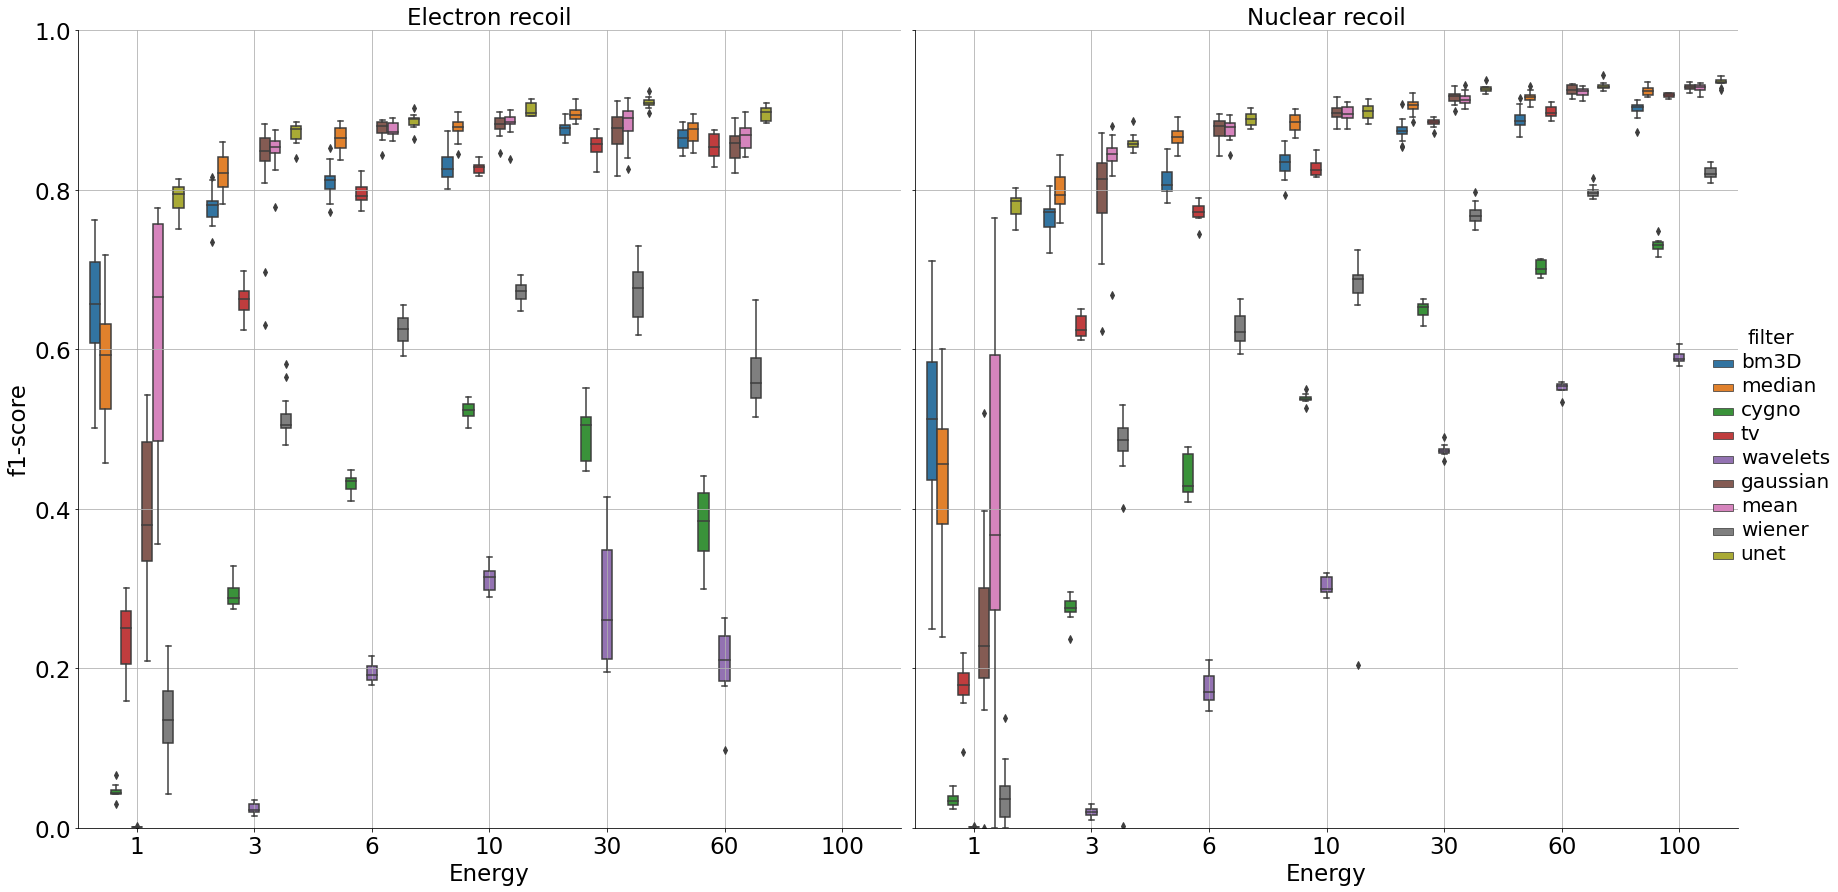

In [11]:
#plt.figure(figsize=(30,15))
g = sns.catplot(x="energy", y="f1", hue="filter", col="particle", data=best_filters, kind="box", height=12, aspect=1)
axes = g.axes.ravel()
axes[0].grid()
axes[1].grid()
axes[0].set_xlabel('Energy', fontsize=23)
axes[0].set_ylabel('f1-score', fontsize=23)
axes[1].set_xlabel('Energy', fontsize=23)
axes[0].tick_params(axis='both', which='major', labelsize=23)
axes[1].tick_params(axis='both', which='major', labelsize=23)
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])
axes[0].set_title('Electron recoil', fontsize=23)
axes[1].set_title('Nuclear recoil', fontsize=23)

plt.setp(g._legend.get_texts(), fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)

In [12]:
threshold_precision = 0.90
result_table['recall_at_p'] = result_table.apply(lambda x: recall_from_roc(x, threshold_precision), axis=1)
result_table['energy_at_p'] = result_table.apply(lambda x: energy_from_roc(x, threshold_precision), axis=1)

In [13]:
energy_table = result_table.groupby(['particle', 'energy', 'image', 'filter']).agg({'f1':'max', 'recall_at_p': 'max', 'energy_at_p':'max', 'cluster_integral': 'max', 'energia_ped':'max'}).reset_index()

In [14]:
energy_table

,particle,energy,image,filter,f1,recall_at_p,energy_at_p,cluster_integral,energia_ped
0,ER,1,pic_run1_ev1,bm3D,0.655462,0.384977,284.869463,498.0,557.003767
1,ER,1,pic_run1_ev1,median,0.569343,0.211268,176.003860,498.0,557.003767
2,ER,1,pic_run1_ev10,cygno,0.029499,0.009390,18.554796,498.0,433.743309
3,ER,1,pic_run1_ev14,bm3D,0.640884,0.488789,373.403318,499.0,495.604244
4,ER,1,pic_run1_ev14,median,0.526946,0.313901,272.693068,499.0,495.604244
...,...,...,...,...,...,...,...,...,...
1729,He,100,pic_run1_ev97,wiener,0.814875,0.710959,7156.490235,49920.0,7472.114393
1730,He,100,pic_run1_ev98,bm3D,0.894356,0.840483,49704.590128,49874.0,49821.610470
1731,He,100,pic_run1_ev98,median,0.929293,0.941019,49778.268393,49874.0,49821.610470
1732,He,100,pic_run1_ev99,cygno,0.734155,0.586498,48777.967099,49898.0,49914.762613


In [15]:
energy_table.columns = ['particle', 'energy', 'image', 'filter', 'f1', 'recall_p_value', 'recovered_energy', 'cluster_integral_truth', 'cluster_integral_after_ped']

In [16]:
data=pd.melt(energy_table[['energy', 'particle', 'cluster_integral_truth', 'cluster_integral_after_ped']], id_vars=['particle', 'energy'])
data

,particle,energy,variable,value
0,ER,1,cluster_integral_truth,498.000000
1,ER,1,cluster_integral_truth,498.000000
2,ER,1,cluster_integral_truth,498.000000
3,ER,1,cluster_integral_truth,499.000000
4,ER,1,cluster_integral_truth,499.000000
...,...,...,...,...
3463,He,100,cluster_integral_after_ped,7472.114393
3464,He,100,cluster_integral_after_ped,49821.610470
3465,He,100,cluster_integral_after_ped,49821.610470
3466,He,100,cluster_integral_after_ped,49914.762613


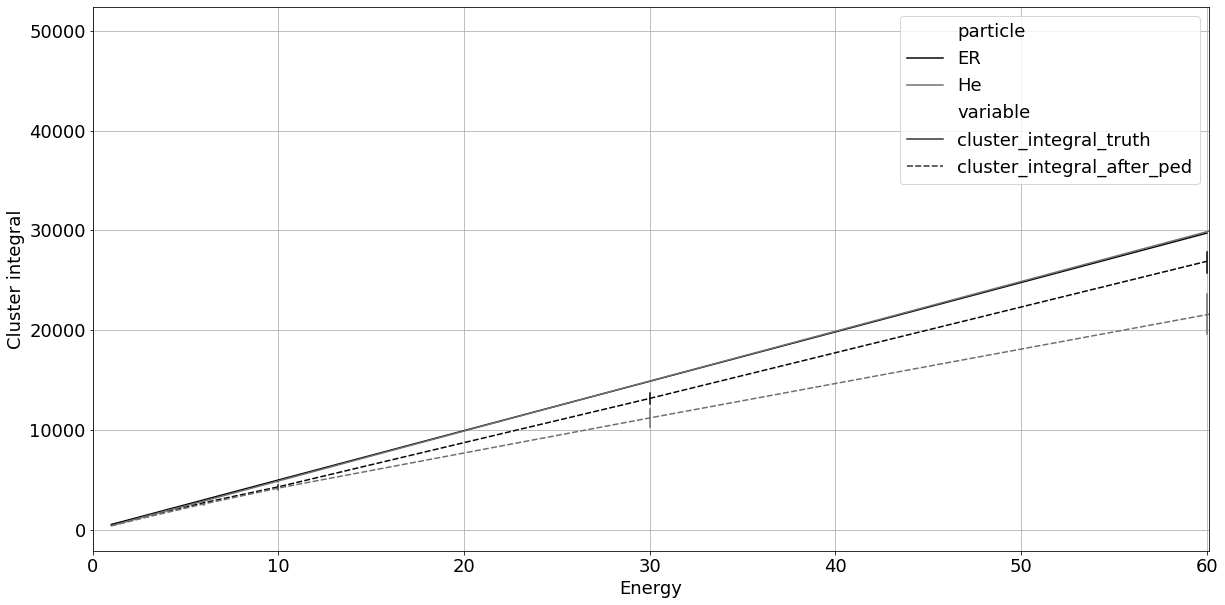

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
#palette = sns.color_palette("mako_r", 2)
# Create an array with the colors you want to use
colors = ["#040404", "#6F6F6F"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
sns.lineplot(x="energy", y="value", hue="particle", data=data,  err_style="bars", style="variable",  palette=customPalette, ax=axes)
axes.grid()
axes.set_ylabel('Cluster integral', fontsize=18)
axes.set_xlabel('Energy', fontsize=18)
axes.set_xlim([0, 60.1])
axes.tick_params(axis='both', which='major', labelsize=18)
axes.legend(fontsize=18)

In [18]:
energy_filter = energy_table[['energy', 'particle', 'filter', 'recovered_energy']]

In [19]:
energy_real = energy_table[['energy', 'particle', 'cluster_integral_after_ped']]
energy_real.columns = ['energy', 'particle', 'recovered_energy']
energy_real['filter'] = 'Energy after ped rem'

In [20]:
energy_filter = energy_filter.append(energy_real).reset_index(drop=True)

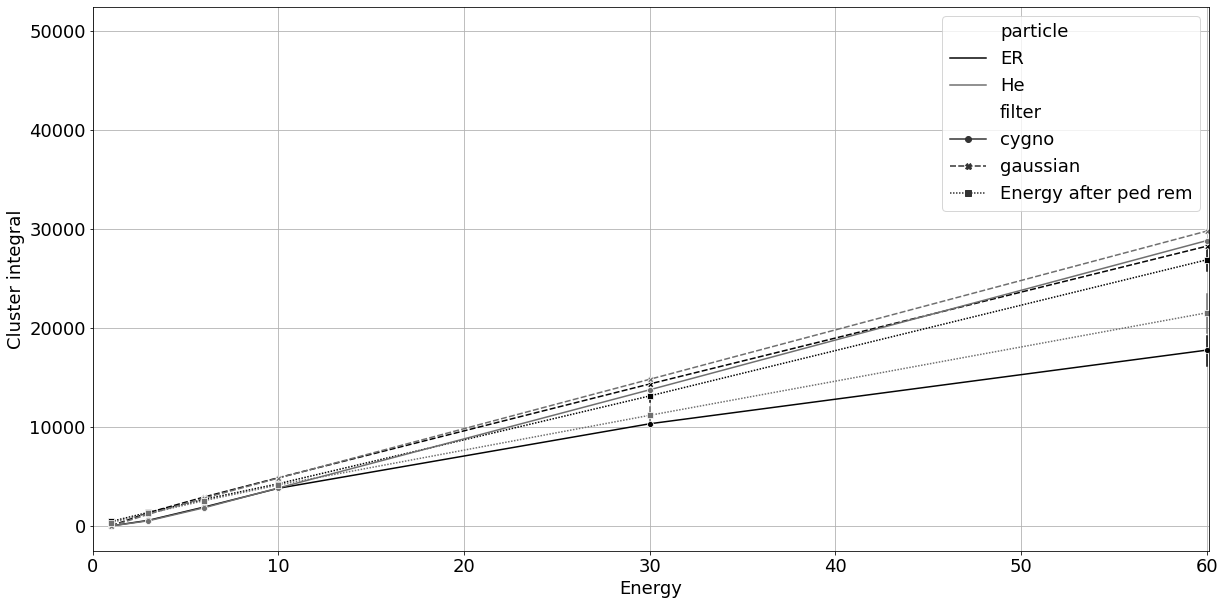

In [21]:
selec_filters = ['gaussian', 'Energy after ped rem', 'cygno']

# Create an array with the colors you want to use
colors = ["#040404", "#6F6F6F"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
#palette = sns.color_palette("hls", 2)
ax = sns.lineplot(x="energy", y="recovered_energy", hue="particle", data=energy_filter[energy_filter['filter'].isin(selec_filters)],  err_style="bars", style="filter",  palette=customPalette, markers=True,ax=axes)
axes.grid()
axes.set_ylabel('Cluster integral', fontsize=18)
axes.set_xlabel('Energy', fontsize=18)
axes.set_xlim([0, 60.1])
axes.tick_params(axis='both', which='major', labelsize=18)
axes.legend(fontsize=18)

## Which point should I have to use?

In [22]:
result_table_by_filter = result_table.groupby(['filter', 'parameter', 'particle', 'energy']).agg({'f1':['median', lambda x: np.quantile(x, q=0.25), lambda x: np.quantile(x, q=0.75)], 'precision':[lambda x: list(x)], 'recall':[lambda x: list(x)], 'threshold_all':[lambda x: list(x)]}).reset_index()
result_table_by_filter.columns = ['filter', 'parameter', 'particle', 'energy', 'f1_median', '25q', '75q', 'precision', 'recall', 'threshold']

In [63]:
particle = 'He'
energy = 100
filter_by_particle_and_energy = result_table_by_filter[(result_table_by_filter.particle == particle)&(result_table_by_filter.energy == energy)]
best_filters = filter_by_particle_and_energy.sort_values('f1_median', ascending=False).drop_duplicates(subset='filter', keep='first')

## Check $1.3 \sigma$ point

In [64]:
p = best_filters[best_filters['filter']=='cygno'].precision.values[0]
r = best_filters[best_filters['filter']=='cygno'].recall.values[0]
t = best_filters[best_filters['filter']=='cygno'].threshold.values[0]

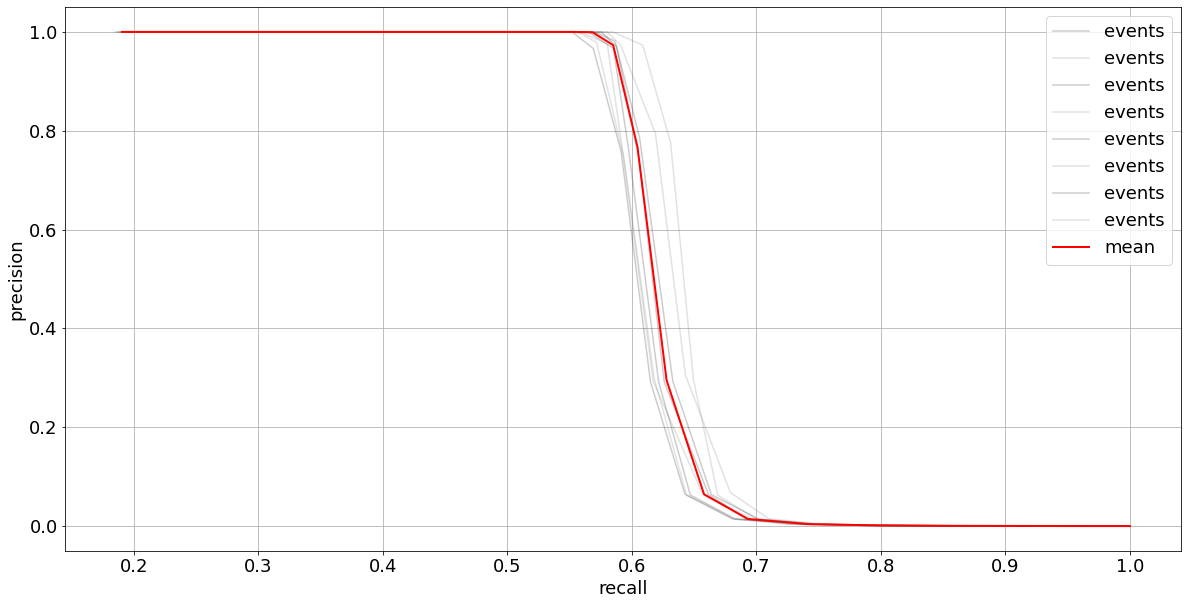

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(r).T, np.array(p).T, label='events', alpha=0.2)
plt.plot(np.array(r).mean(axis=0), np.array(p).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
plt.grid()
plt.xlabel('recall', fontsize=18)
plt.ylabel('precision', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

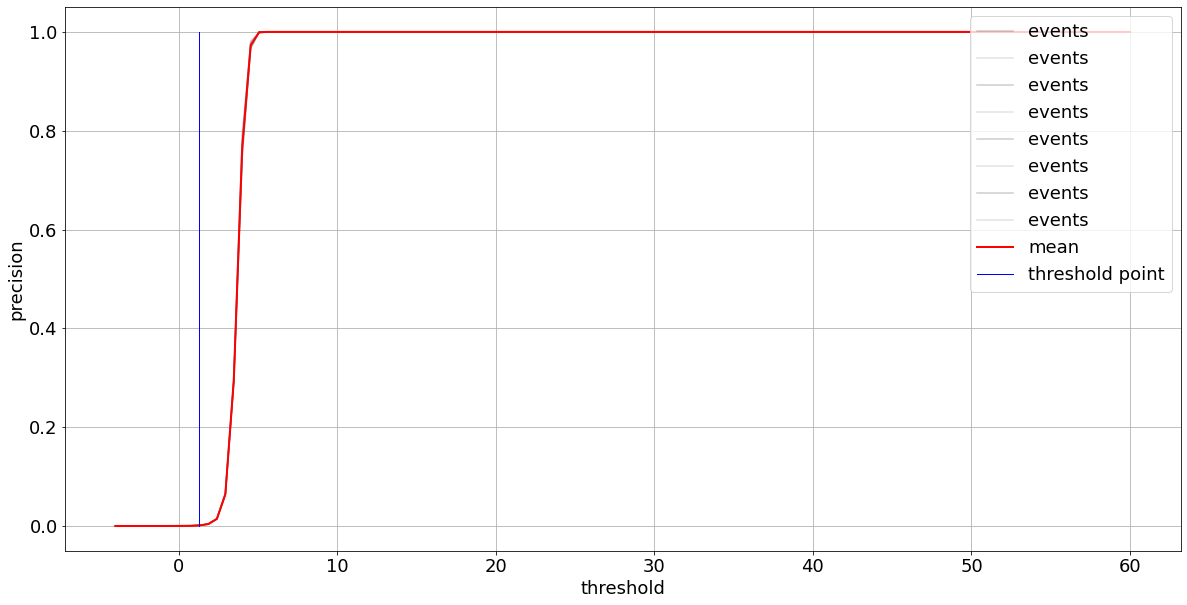

In [66]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(t).T, np.array(p).T, label='events', alpha=0.2)
plt.plot(np.array(t).mean(axis=0), np.array(p).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
plt.plot(1.3*np.ones((100,)), np.linspace(0,1, 100), color = 'b', linewidth=1.0, label='threshold point')
plt.grid()
plt.xlabel('threshold', fontsize=18)
plt.ylabel('precision', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=1, fontsize=18)

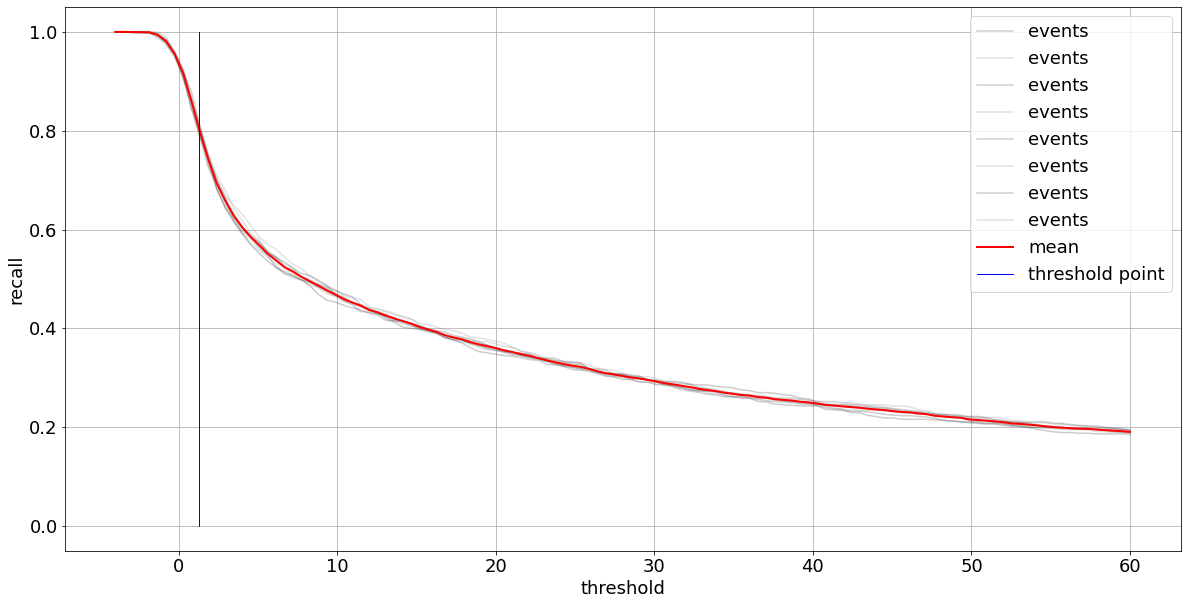

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(t).T, np.array(r).T, label='events', alpha=0.2)
plt.plot(np.array(t).mean(axis=0), np.array(r).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
plt.plot(1.3*np.ones((100,)), np.linspace(0,1, 100), color = 'b', linewidth=1.0, label='threshold point')
plt.grid()
plt.xlabel('threshold', fontsize=18)
plt.ylabel('recall', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=1, fontsize=18)

In [72]:
interp_p = np.interp(1.3, np.array(r).mean(axis=0), np.array(p).mean(axis=0))

### Get precision of other filters

For bm3D filter, threshold is 28.728332919445812
For cygno filter, threshold is 6.666666666666665
For gaussian filter, threshold is 62.40574477567499
For mean filter, threshold is 35.961307515409956
For median filter, threshold is 22.621032220875794
For tv filter, threshold is 42.72396254067123
Error at unet
Error at wavelets
For wiener filter, threshold is 8.985906040858254


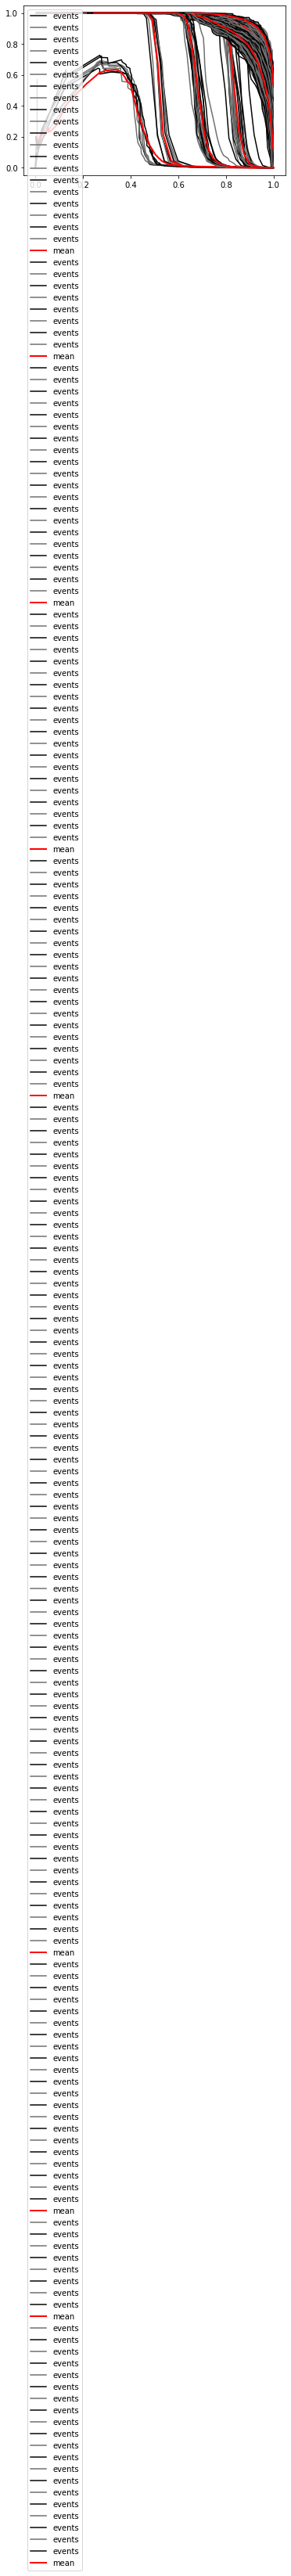

In [121]:
for filter_name in np.unique(best_filters['filter']):
#filter_name = 'cygno'
    try:
        p = best_filters[best_filters['filter']==filter_name].precision.values[0]
        r = best_filters[best_filters['filter']==filter_name].recall.values[0]
        t = best_filters[best_filters['filter']==filter_name].threshold.values[0]
        plt.plot(np.array(r).T, np.array(p).T, label='events')
        plt.plot(np.array(r).mean(axis=0), np.array(p).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
        plt.legend()

        r_filtered = np.array(r).mean(axis=0)[abs(interp_p - np.array(p).mean(axis=0)) == 0]
        t_filtered = np.array(t).mean(axis=0)[abs(interp_p - np.array(p).mean(axis=0)) == 0]
        print('For {} filter, threshold is {}'.format(filter_name, t_filtered[r_filtered.argmax()]))
    except:
        print('Error at {}'.format(filter_name))

array(['bm3D', 'cygno', 'gaussian', 'mean', 'median', 'tv', 'unet',
       'wavelets', 'wiener'], dtype=object)

array([0.5342114 , 0.52299679, 0.51321291, 0.50066998, 0.49006239,
       0.47947206, 0.46799166, 0.45775407, 0.44626765, 0.43638235,
       0.42532853, 0.41597971, 0.40583163, 0.39531468, 0.38563664,
       0.37700792, 0.36684771, 0.35686356, 0.34761011, 0.33824537,
       0.32880437, 0.32026615, 0.31029646, 0.30247546, 0.29338141,
       0.28519578, 0.27734344, 0.2667662 , 0.25830598, 0.25028338,
       0.24263266, 0.23417606, 0.22597229, 0.21804731, 0.21050043,
       0.20158949, 0.1942803 , 0.18662328, 0.17940725, 0.17156665,
       0.16347322, 0.15555307, 0.14915211, 0.14184375, 0.13417033,
       0.12776796, 0.1197632 , 0.11209615, 0.10595018, 0.09928549,
       0.09162033, 0.08521129, 0.07863844, 0.07148929, 0.06534755,
       0.05797244, 0.05181879, 0.04541227, 0.03890473, 0.03267754,
       0.02564355, 0.01976633, 0.01362326, 0.00686178])

In [108]:
t_filtered

array([ 62.40574478,  63.27630503,  64.14686529,  65.01742554,
        65.8879858 ,  66.75854606,  67.62910631,  68.49966657,
        69.37022682,  70.24078708,  71.11134734,  71.98190759,
        72.85246785,  73.7230281 ,  74.59358836,  75.46414862,
        76.33470887,  77.20526913,  78.07582939,  78.94638964,
        79.8169499 ,  80.68751015,  81.55807041,  82.42863067,
        83.29919092,  84.16975118,  85.04031143,  85.91087169,
        86.78143195,  87.6519922 ,  88.52255246,  89.39311271,
        90.26367297,  91.13423323,  92.00479348,  92.87535374,
        93.74591399,  94.61647425,  95.48703451,  96.35759476,
        97.22815502,  98.09871528,  98.96927553,  99.83983579,
       100.71039604, 101.5809563 , 102.45151656, 103.32207681,
       104.19263707, 105.06319732, 105.93375758, 106.80431784,
       107.67487809, 108.54543835, 109.4159986 , 110.28655886,
       111.15711912, 112.02767937, 112.89823963, 113.76879988,
       114.63936014, 115.5099204 , 116.38048065, 117.25

## Filters working in a real environment

In [23]:
result_table_by_filter = result_table.groupby(['filter', 'parameter']).agg({'f1':['median', lambda x: np.quantile(x, q=0.25), lambda x: np.quantile(x, q=0.75)], 'precision':[lambda x: list(x)], 'recall':[lambda x: list(x)], 'threshold_all':[lambda x: list(x)]}).reset_index()
result_table_by_filter.columns = ['filter', 'parameter', 'f1_median', '25q', '75q', 'precision', 'recall', 'threshold']

In [24]:
result_table_by_filter = result_table_by_filter.sort_values('f1_median', ascending=False).drop_duplicates(subset='filter', keep='first')

In [25]:
result_table_by_filter['precision'] = result_table_by_filter.precision.apply(lambda x: np.array(x).mean(axis=0))
result_table_by_filter['recall'] = result_table_by_filter.recall.apply(lambda x: np.array(x).mean(axis=0))
result_table_by_filter['threshold'] = result_table_by_filter.threshold.apply(lambda x: np.array(x).mean(axis=0))

In [26]:
result_table_by_filter = result_table_by_filter.reset_index().drop('index', axis=1)

In [27]:
result_table_by_filter

,filter,parameter,f1_median,25q,75q,precision,recall,threshold
0,unet,0,0.893855,0.864615,0.921754,"[0.45671105494476877, 0.5021352038867012, 0.52...","[0.9976654747738749, 0.996339336375459, 0.9949...","[0.017166606574140094, 0.02535459411640962, 0...."
1,mean,11,0.876425,0.824972,0.901677,"[0.002861843363185918, 0.11619688661328506, 0....","[0.9974981496305669, 0.9939918857544965, 0.987...","[-0.23687400112253099, 0.42701447541654597, 1...."
2,gaussian,13,0.872661,0.812138,0.901919,"[0.18554375424395783, 0.22014984635464838, 0.2...","[0.9974981496305669, 0.9964830945882155, 0.994...","[2.5386907271460815, 3.1443771242591065, 3.750..."
3,median,19,0.869669,0.816175,0.894736,"[0.023048475592909904, 0.13790938869933367, 0....","[0.9975299464091353, 0.9924522079179433, 0.977...","[1.0375671237165343, 1.6617120433742119, 2.285..."
4,bm3D,8,0.825941,0.775583,0.871968,"[0.0002619515544281131, 0.0003612040424617654,...","[0.997613146681639, 0.9897703879139136, 0.9749...","[-0.795090945254868, -0.29770905006781406, 0.1..."
5,tv,0,0.782365,0.633017,0.854229,"[0.04796122561575237, 0.06350886621572742, 0.0...","[0.9976488756720243, 0.9968476054381941, 0.995...","[1.498300873156591, 1.9076842442270074, 2.3170..."
6,wiener,1,0.634468,0.503379,0.702589,"[0.00021869560528999535, 0.0002198357129356990...","[0.9955087679122814, 0.9948134756018554, 0.994...","[-2.538631792330023, -2.380736229919634, -2.22..."
7,cygno,0,0.444462,0.289720,0.545819,"[0.00021216942178668596, 0.000212216188403831,...","[0.9999980380770015, 0.9999962561302603, 0.999...","[-4.0, -3.4666666666666597, -2.933333333333336..."
8,wavelets,0,0.210153,0.022949,0.348096,"[0.00021010987637152184, 0.0002101525023588250...","[0.9976488756720211, 0.9976039114482098, 0.997...","[-8.000368384719344, -7.854191721694409, -7.70..."


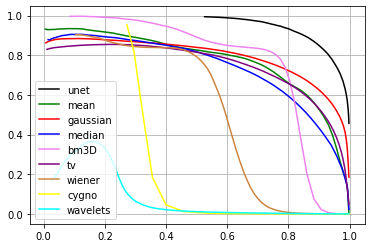

In [28]:
color = ['black', 'green', 'red', 'blue', 'violet', 'purple', 'peru', 'yellow', 'cyan']
for i in range(result_table_by_filter.shape[0]):
    row = result_table_by_filter.loc[i,:]
    x = row.recall
    y = row.precision
    fname = row['filter']
    plt.plot(x,y, label=fname, color=color[i])
plt.legend()
plt.grid()

## Determinando o ponto de operação

In [29]:
value = 0.2
output_params = {'filter':[], 'parameter':[], 'precision':[], 'recall': [], 'threshold_value': []}
for i in range(result_table_by_filter.shape[0]):
    row = result_table_by_filter.loc[i,:]
    x = row.recall
    y = row.precision
    index, precision_value = find_nearest(np.nan_to_num(y), value)
    output_params['filter'].append(row['filter'])
    output_params['parameter'].append(row.parameter)
    output_params['threshold_value'].append(row.threshold[index])
    output_params['precision'].append(precision_value)
    output_params['recall'].append(x[index])

In [30]:
output = pd.DataFrame(output_params)

In [31]:
output

,filter,parameter,precision,recall,threshold_value
0,unet,0,0.000000,0.000775,0.999725
1,mean,11,0.210727,0.978913,1.754791
2,gaussian,13,0.185544,0.997498,2.538691
3,median,19,0.220057,0.977317,2.285857
4,bm3D,8,0.203123,0.860357,2.686582
5,tv,0,0.191098,0.987572,3.545218
6,wiener,1,0.217911,0.652043,3.303504
7,cygno,0,0.185215,0.355351,3.466667
8,wavelets,0,0.200682,0.043350,9.248478


In [32]:
n_filters = 2
output[1:1+n_filters].reset_index().to_json('../data/clustering_params.json', orient='records')

## Test segmented

In [33]:
result_table_by_filter = result_table.groupby(['filter', 'parameter', 'particle', 'energy']).agg({'f1':['median', lambda x: np.quantile(x, q=0.25), lambda x: np.quantile(x, q=0.75)], 'precision':[lambda x: list(x)], 'recall':[lambda x: list(x)], 'threshold_all':[lambda x: list(x)]}).reset_index()
result_table_by_filter.columns = ['filter', 'parameter', 'particle', 'energy', 'f1_median', '25q', '75q', 'precision', 'recall', 'threshold']

In [34]:
f_chosen = result_table_by_filter[(result_table_by_filter['particle'] == 'He') & (result_table_by_filter['energy'] == 60) & (result_table_by_filter['filter'] == 'median') & (result_table_by_filter['parameter'] == 17)]

In [35]:
f_cygno = result_table_by_filter[(result_table_by_filter['particle'] == 'He') & (result_table_by_filter['energy'] == 60) & (result_table_by_filter['filter'] == 'cygno')]

In [36]:
p_filt = f_chosen.precision.values[0]
r_filt = f_chosen.recall.values[0]
t_filt = f_chosen.threshold.values[0]
p_cygno = f_cygno.precision.values[0]
r_cygno = f_cygno.recall.values[0]
t_cygno = f_cygno.threshold.values[0]

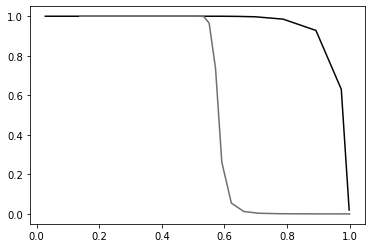

In [37]:
plt.plot(np.array(r_filt).mean(axis=0), np.array(p_filt).mean(axis=0))
plt.plot(np.array(r_cygno).mean(axis=0), np.array(p_cygno).mean(axis=0))

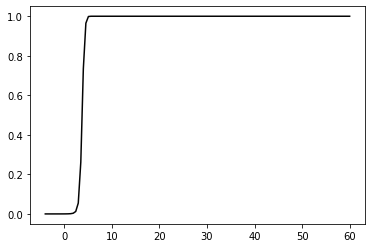

In [38]:

plt.plot(np.array(t_cygno).mean(axis=0), np.array(p_cygno).mean(axis=0))

In [39]:
np.array(t_cygno).mean(axis=0)[16]

4.533333333333332

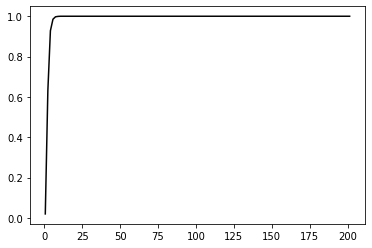

In [40]:
plt.plot(np.array(t_filt).mean(axis=0), np.array(p_filt).mean(axis=0))

In [41]:
sum(np.array(t_filt).mean(axis=0)[2:4]/2)

4.935491134823932